## Introduction
I mbarked on an engaging project analyzing vegetable prices using the dataset from Agmarknet. This project provides a valuable resource for researchers, analysts, and enthusiasts interested in understanding the dynamics of vegetable pricing trends. 

So to accomplish this project I followed a systematic approach that emphasizes cleanliness, exploration, and visualization.

## Data Collection & Cleaning
The official source for my dataset is Agmarknet https://agmarknet.gov , this is where I fetched the data on vegetable prices. On my analysis I will be focusing on vegetable prices, so the project's data will include daily price updates for different markets.

In [13]:
import pandas as pd
dataset = pd.read_csv('/home/nomfundo/Veggies/analyzing-vegetable-prices/prices.csv')

In [14]:
dataset.head()  # View the first few rows
dataset.info()  # Check data types and missing values
dataset.describe()  # Summary statistics for numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    int64  
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    int64  
 5   Brinjal                 287 non-null    int64  
 6   Garlic                  287 non-null    int64  
 7   Peas                    287 non-null    int64  
 8   Methi                   287 non-null    int64  
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 24.8+ KB


,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,20.383275,44.122404,28.797909
std,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,117.428417,12.796590,6.607973
min,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,2000.000000,90.000000,50.000000


In [22]:
#Handle Missing Values: Identify and impute or remove missing data where necessary.

missing_values = dataset.isnull().sum()
dataset.fillna(method='ffill', inplace=True)  # Example of forward filling

/tmp/ipykernel_538/2150786932.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='ffill', inplace=True)  # Example of forward filling


In [9]:
print(dataset.columns)

Index(['Price Dates', 'Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato',
       'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli',
       'Elephant Yam (Suran)'],
      dtype='object')


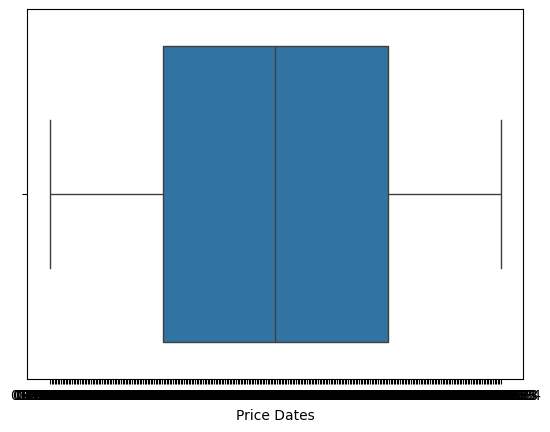

In [25]:
#Identify Outliers: Used statistical methods, such as z-scores or IQR, to detect outliers. Visualized this with boxplots
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=dataset, x="Price Dates")
plt.show()

In [11]:
#Filtering Numerical Data: Keep only the relevant numerical columns (like price, quantity).
#Scaling Data: Normalized the data to ensure that features contribute equally.
numerical_data = dataset.select_dtypes(include=['float64', 'int64'])

## Exploratory Data Analysis
Let's build an interactive analysis that walks you through comparing vegetable prices, extracting insights, and documenting everything in a clear manner.


In [26]:
# Load the dataset
dataset = pd.read_csv('/home/nomfundo/Veggies/analyzing-vegetable-prices/prices.csv')
# Display the first few rows of the dataset to understand its structure
dataset.head()

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25


In [29]:
print(dataset.columns)

Index(['Price Dates', 'Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato',
       'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli',
       'Elephant Yam (Suran)'],
      dtype='object')


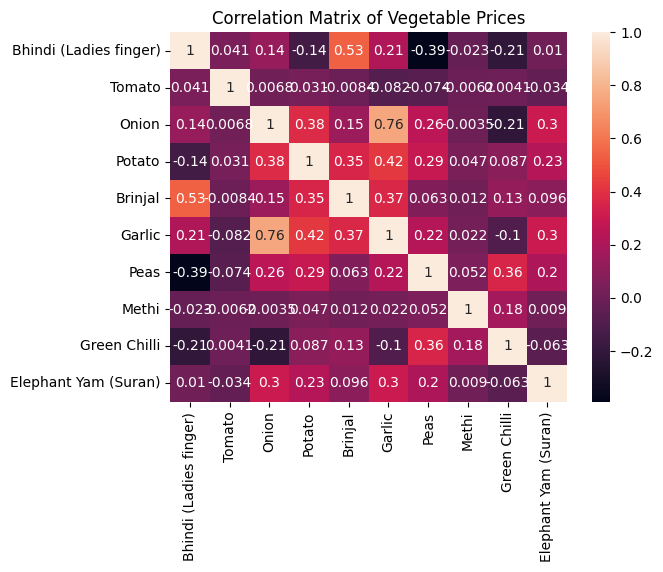

In [39]:
# Price Trends Over Time (Assuming 'Price Dates' represents dates):
import seaborn as sns

# Filter data for non-zero prices
filtered_data = dataset[dataset.columns[1:]]  # Exclude first column
filtered_data = filtered_data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric (optional)

# Calculate correlation matrix
corr_matrix = filtered_data.corr()

# Create a heatmap to visualize correlations between vegetable prices
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix of Vegetable Prices')
plt.show()


#Each cell in the matrix represents the correlation coefficient between two vegetables.
#A correlation coefficient ranges from -1 to 1:
# 1: Indicates a perfect positive correlation. Prices of both vegetables move in the same direction (e.g., when the price of one increases, the other also increases).
# -1: Indicates a perfect negative correlation. Prices move in opposite directions (e.g., when the price of one increases, the other decreases)
#  0: Indicates no correlation between the prices.

Market Basket Analysis: Researchers can identify groups of vegetables that are frequently purchased together (e.g., complementary goods). This information can be used to optimize product placement in stores or create targeted marketing campaigns.
Pricing Strategies: Retailers can use this knowledge to strategically price related vegetables to encourage cross-selling and increase sales.